In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [51]:
input_image = cv2.imread(r'C:\Users\saket\Desktop\courses\TF\OpenCV\Master OpenCV\images\beatle.jpg')

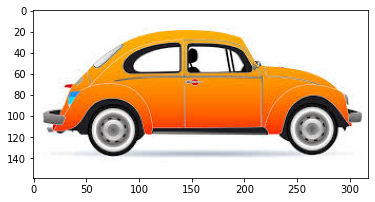

In [52]:
plt.imshow(input_image)

In [67]:
## finding edges
def get_image_countours(input_image):
    edge = cv2.Canny(input_image,200,200)
    plt.imshow(edge)
    contours,heirarchy = cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    plt.imshow(edge)
    return contours,heirarchy

Number of Contours:  110


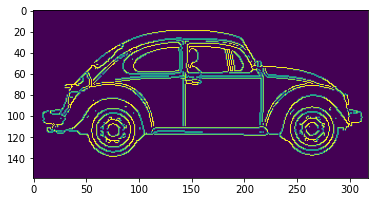

In [56]:
## finding contours
contours,heirarchy = cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
print('Number of Contours: ',len(contours))
plt.imshow(edge)

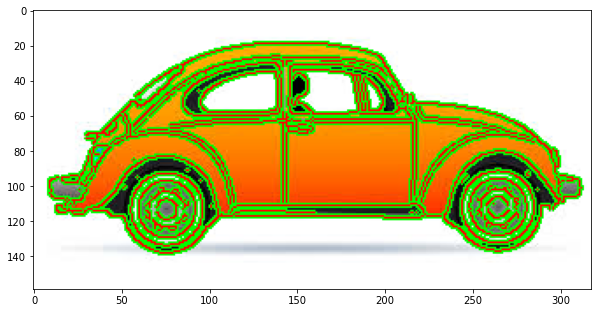

In [61]:
## Draw contours on the image
cv2.drawContours(input_image,contours,-1,(255,0,0),1)
plt.figure(figsize = (10,12))
plt.imshow(input_image)

### Sorting Contours 
##### Good for image processing and object detection

In [63]:
input_image_sort = cv2.imread(r'C:\Users\saket\Desktop\courses\TF\OpenCV\Master OpenCV\images\bunchofshapes.jpg')

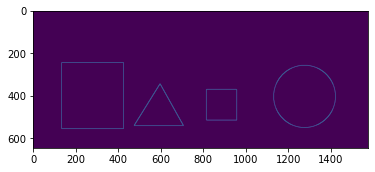

In [68]:
contours,hierarchy = get_image_countours(input_image_sort)

In [69]:
## Sorting by area
def calc_area(contours):
    area = []
    for cnt in contours:
        ar = cv2.contourArea(cnt)
        area.append(ar)
    return area

print('contour area before sort: ', calc_area(contours))

sort = sorted(contours,key = cv2.contourArea,reverse = False)
print('contour area after sort: ',calc_area(sort))

contour area before sort:  [20585.5, 20587.5, 22673.5, 22903.5, 66336.5, 66573.5, 89918.0, 89920.0]
contour area after sort:  [20585.5, 20587.5, 22673.5, 22903.5, 66336.5, 66573.5, 89918.0, 89920.0]
